<a href="https://colab.research.google.com/github/ananyanigam197/IDEAS-TIH-PROJECT-AUTUMN-INTERNSHIP-2025-/blob/main/TIH_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installed missing package gensim
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requi

In [1]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [1]:
# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# read the csv file using pandas dataframe
fake_news_data = pd.read_csv('/content/drive/MyDrive/04_fake_news_detection_and_evaluation/fake.csv')
true_news_data = pd.read_csv('/content/drive/MyDrive/04_fake_news_detection_and_evaluation/true.csv')

**Q1. View the imported csv file data using Pandas Dataframe.**

In [3]:
display(fake_news_data.head())
display(true_news_data.head())

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

In [5]:
# merged true and fake news datasets
merged_data = [fake_news_data,true_news_data]
df = pd.concat(merged_data,axis=0)

**Q2. drop rows from the dataset consisting null values.**

In [6]:
df = df.dropna()
display(df.shape)

(44898, 5)


**Q3. shuffle the data.**

In [7]:
df = df.sample(frac=1)
display(df.head())

,title,text,subject,date,class
5658,State Department informed of court ruling on T...,WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,"February 4, 2017",0
2338,New White House chief of staff assures attorne...,WASHINGTON (Reuters) - New White House Chief o...,politicsNews,"August 3, 2017",0
18808,Brexit bill gives UK ministers 'excessively wi...,LONDON (Reuters) - A parliamentary committee o...,worldnews,"September 28, 2017",0
4070,"Canada, Mexico stocks, currencies fall as U.S....",NEW YORK (Reuters) - Mexican and Canadian stoc...,politicsNews,"April 26, 2017",0
20941,Colombia urges ELN rebels to turn over body of...,BOGOTA (Reuters) - Colombia s government on Tu...,worldnews,"September 5, 2017",0


In [8]:
#reset index of the merged dataframe
df = df.reset_index(drop=True)

In [9]:
# view top 10 rows of processed dataset
df.head(10)

,title,text,subject,date,class
0,State Department informed of court ruling on T...,WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,"February 4, 2017",0
1,New White House chief of staff assures attorne...,WASHINGTON (Reuters) - New White House Chief o...,politicsNews,"August 3, 2017",0
2,Brexit bill gives UK ministers 'excessively wi...,LONDON (Reuters) - A parliamentary committee o...,worldnews,"September 28, 2017",0
3,"Canada, Mexico stocks, currencies fall as U.S....",NEW YORK (Reuters) - Mexican and Canadian stoc...,politicsNews,"April 26, 2017",0
4,Colombia urges ELN rebels to turn over body of...,BOGOTA (Reuters) - Colombia s government on Tu...,worldnews,"September 5, 2017",0
5,ONLY 5.7% OF CLINTON FOUNDATION DONATIONS Went...,The 2014 IRS filings for the Clinton Foundatio...,politics,"Sep 17, 2016",1
6,"House blocks Google-hosted apps, Yahoo Mail ov...",WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"May 11, 2016",0
7,"Wealthy, educated voters fuel Trump's East Coa...","WASHINGTON/BETHESDA, Md. (Reuters) - Wealthy, ...",politicsNews,"April 28, 2016",0
8,NYC COP Congratulates Trump Supporter For Educ...,"Based Stickman, aka Kyle Chapman became famous...",left-news,"Jun 29, 2017",1
9,POLICE CALLED TO GRISLY MURDER SCENE: Find Dec...,"Better a blow-up doll than an actual citizen, ...",left-news,"May 13, 2016",1


**Q4. view the text content of a random data point.**

In [10]:
random_row = df.sample(n=1)
display(random_row)

,title,text,subject,date,class
37177,Alabama’s Only Gay Rep Just Dropped A Devasta...,Alabama State Rep. Patricia Todd (D) made wave...,News,"May 20, 2016",1


**Data Visualization**

Text(0, 0.5, 'Number of News')

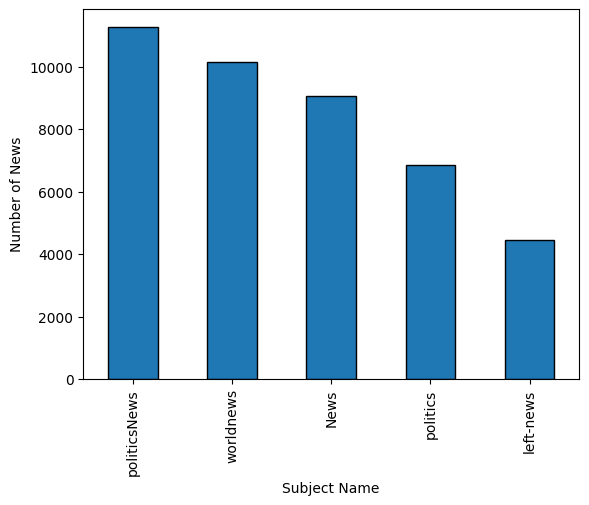

In [11]:
#create a data visualzation of bar/column/line chart of top 5 subjects ->
top_5_subjects = (df['subject'].value_counts()).nlargest(5)
top_5_subjects.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subject Name')
plt.ylabel('Number of News')

**Q5. Create a pie chart to find the pecentage of news on different subjects.**

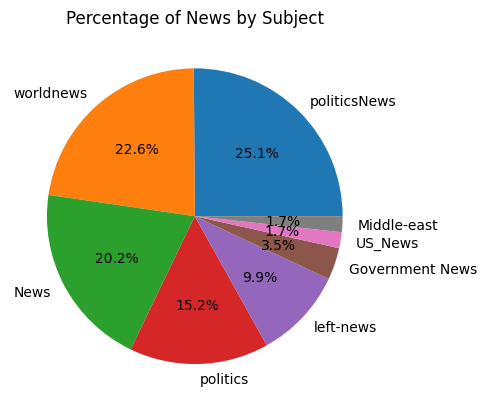

In [12]:
subject_counts = df['subject'].value_counts()
subject_counts.plot(kind='pie', autopct='%1.1f%%', labels=subject_counts.index)
plt.title('Percentage of News by Subject')
plt.ylabel('')
plt.show()

**Text Processing**

In [13]:
# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\S+|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

In [14]:
# drop unnecessary columns for classification purpose
df1= df.drop(['title','subject','date'],axis=1)

In [15]:
# apply wordopt method to the whole dataset and view the text content of a random data point
df1['text']=df1['text'].apply(wordopt)
df1['text'][100]

'geneva reuters u s secretary of state rex tillerson said on thursday iraq must stand on its own in the face of iranian influence while recognizing that the two states shared a long border and legitimate economic interests tillerson who held talks with iraqi prime minister haider al abadi in baghdad this week was asked by reporters in geneva about blunting iran s influence what we are saying to the iraqis is you must develop the capacity to stand on your own he said the united states remained very concerned about the fighting that has erupted between iraqi security forces and the kurdish peshmerga militia over the kurdish independence referendum tillerson said he said that the united states was disappointed that the parties have been unable to reach an entirely peaceful resolution and that he had encouraged abadi to accept erbil s the kurdistan regional government s overtures for talks on the basis of the iraqi constitution '

# **Building Model**

In [16]:
# Separate independent and target columns from the dataset and stored them in x & y variables
x= df1['text']
y= df1['class']


**Q6. Split the dataset into training and testing sets with 25% test size and store them in x_train, x_test, y_train, and y_test.**

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [18]:
# import bbc_news data using url link in json format for training Word2Vec word embedding model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content']
print("Size of Word Dictonary for training Word2Vec: ",news_seg.shape[0])
news_seg.head(2)

Size of Word Dictonary for training Word2Vec:  15825


,content
0,The heroin substitute methadone can be used as...
1,The eldest son of North Korean leader Kim Jong...


In [19]:
# Use head() method on the news DataFrame
display(news.head())

,tags,title,news_post_date,raw_content,content,url,author,language,_id,region,short_description,category,crawled_at
0,,Why quitting heroin substitute methadone is 'v...,2010-08-06T02:46:40.000Z,"<div data-component=""text-block"" class=""ssrcss...",The heroin substitute methadone can be used as...,https://www.bbc.co.uk/news/health-10869329,By Linda Pressly,en_GB,45cbcb62-840b-5a1d-9b59-d7f57f3ab7f6,Health,Heroin substitute methadone is used to wean ad...,BBC News,2021-05-02 17:19:39
1,"North Korea, Kim Jong-un, Kim Jong-il, Kim Jon...",North Korea leader's eldest son 'opposes dynasty',2010-10-12T08:54:42.000Z,"<div data-component=""text-block"" class=""ssrcss...",The eldest son of North Korean leader Kim Jong...,https://www.bbc.co.uk/news/world-asia-pacific-...,,en_GB,771b9c0d-88e1-589f-bf56-8ef80ce161a2,Asia-Pacific,The eldest son of North Korean leader Kim Jong...,BBC News,2021-05-02 17:19:39
2,,Paintings by gangster Reggie Kray go on sale i...,2010-10-27T17:35:24.000Z,"<div data-component=""text-block"" class=""ssrcss...",Seven oil paintings created by notorious gangs...,https://www.bbc.co.uk/news/uk-england-lincolns...,,en_GB,768e3fc6-c406-5570-8328-2e6fb75abd1b,Lincolnshire,A series of oil painting produced by gangster ...,BBC News,2021-05-02 17:19:39
3,,Bracklinn Falls Bridge hauled over gorge by hand,2010-10-08T13:21:50.000Z,"<div data-component=""text-block"" class=""ssrcss...",A 20-tonne bridge is being hauled into place b...,https://www.bbc.co.uk/news/uk-scotland-tayside...,,en_GB,a6e26396-70ec-501c-8ebc-1d600ddf6aab,Tayside and Central Scotland,A 20-tonne bridge is having to be hauled into ...,BBC News,2021-05-02 17:19:39
4,,Manchester soldier's last words become song,2010-09-22T17:35:34.000Z,"<div data-component=""text-block"" class=""ssrcss...",The final words written by a guardsman killed ...,https://www.bbc.co.uk/news/uk-england-manchest...,,en_GB,e8a150a5-b6e0-5315-9c04-fc639dee196f,Manchester,The final words written by a guardsman from Ma...,BBC News,2021-05-02 17:19:39


In [20]:
# apply wordopt function for text processing
news_seg=news_seg.apply(wordopt)
sentences = [sentence.split() for sentence in news_seg ]
w2v_model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [21]:
# function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [22]:
# convert train and test dataset into vector form
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])


# **Logistic Regression**

In [23]:
# Trains a Logistic Regression model using vector formed trained data ->
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(xv_train,y_train)

LogisticRegression()

In [24]:
# detect the class(fake or true) on test data and evaluates its accuracy on test set
y_pred = logistic_model.predict(xv_test)
print("Prediction on test data: ",y_pred)
print("Accuracy Score on Test Data: ",logistic_model.score(xv_test,y_test))

Prediction on test data:  [0 0 1 ... 1 1 1]
Accuracy Score on Test Data:  0.9412026726057906


**Accuracy Checking**

In [25]:
# Check Precision, Recall, F1 Score of the logistic model ->
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9412026726057906
Precision: 0.9465834200485606
Recall: 0.9394148020654045
F1 score: 0.9429854872149275


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5415
           1       0.95      0.94      0.94      5810

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



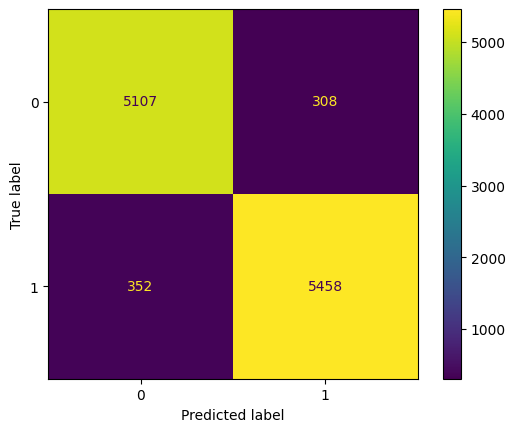

In [27]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

# **Random Forest Classifier**

### **Model Building and Prediction**

**Q7. Use Random Forest Classifer for this classfication purpose and predict the outcomes for test data.**

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(xv_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(xv_test)
y_pred_rf
rf_model_score=rf_model.score(xv_test,y_test)
print("Prediction on test data: ",y_pred_rf)
print("Accuracy Score on Test Data: ",rf_model_score)

Prediction on test data:  [0 0 1 ... 1 1 1]
Accuracy Score on Test Data:  0.9399554565701559


### **Accuracy Checking**

**Q8. Find the accuracy, precison, recall, F1 Score of the model while using Random Forest Classsifier and visualize overall accuracy using confusion matrix.**

In [29]:
# Check Precision, Recall, F1 Score of the Random Forest model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 score:', f1_score(y_test, y_pred_rf))

Accuracy: 0.9399554565701559
Precision: 0.9373297002724795
Recall: 0.9473321858864028
F1 score: 0.9423043999315186


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5415
           1       0.94      0.95      0.94      5810

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



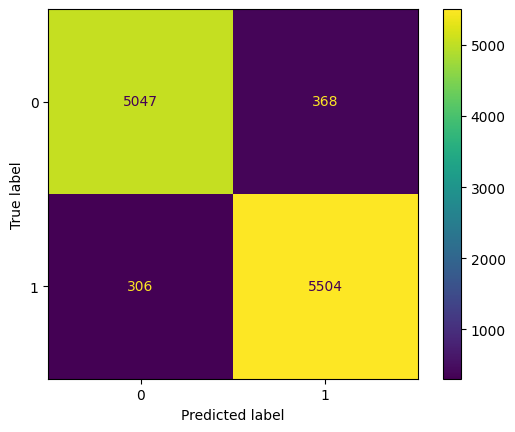

In [31]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf)
cm_display_rf.plot()
plt.show()

# **Save the Model using pickle**

In [32]:
# save the logistic regression model as pickle file
import pickle
import os

save_dir = '/content/drive/MyDrive/colab notebooks'
# Define the full file path for the logistic regression model
filename1 = os.path.join(save_dir, 'logistic_regression_model.pickle')

if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"Directory '{save_dir}' created.")

# Save the model
pickle.dump(logistic_model, open(filename1, 'wb'))


In [33]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.9412026726057906


**Q9. Save the trained Random Forest Model as pickle/svg file in your desired repository for further use.**

In [34]:
# Save the Random Forest model as a pickle file
import pickle
import os

save_dir = '/content/drive/MyDrive/colab notebooks'
filename_rf = os.path.join(save_dir, 'random_forest_model.pickle')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"Directory '{save_dir}' created.")

pickle.dump(rf_model, open(filename_rf, 'wb'))

In [35]:
loaded_model = pickle.load(open(filename_rf, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.9399554565701559


# **Q10. Load that saved model in another Notebook use it on other dataset for fake news detection.**

In [36]:
# Load the saved Random Forest model
import pickle
loaded_rf_model_path = '/content/drive/MyDrive/colab notebooks/random_forest_model.pickle'
loaded_rf_model = pickle.load(open(loaded_rf_model_path, 'rb'))

# Load the saved Logistic Regression model
import pickle
loaded_lr_model_path = '/content/drive/MyDrive/colab notebooks/logistic_regression_model.pickle' # Replace with the actual path to your saved Logistic Regression model
loaded_lr_model = pickle.load(open(loaded_lr_model_path, 'rb'))

**I was not able to find any other dataset to work on and test the models. So as per Sujoy sir's instructions, I have performed the train-val-test split, shuffled it 5 times to get different parameters each time, and then found out their average to find the final aggregates. The following cells are based on the same.**

In [37]:
def split_data(df):
    """Splits the dataframe into training, validation, and testing sets."""
    train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)  # 0.5 of 40% is 20%
    return train_df, val_df, test_df

train_df, val_df, test_df = split_data(df1)
print("Shape of training data:", train_df.shape)
print("Shape of validation data:", val_df.shape)
print("Shape of testing data:", test_df.shape)

Shape of training data: (26938, 2)
Shape of validation data: (8980, 2)
Shape of testing data: (8980, 2)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Lists to store additional metrics for LR
lr_val_precisions = []
lr_val_accuracies = []
lr_val_recalls = []
lr_val_f1_scores = []
lr_test_precisions = []
lr_test_accuracies = []
lr_test_recalls = []
lr_test_f1_scores = []

# Lists to store additional metrics for RFC
rf_val_precisions = []
rf_val_accuracies = []
rf_val_recalls = []
rf_val_f1_scores = []
rf_test_precisions = []
rf_test_accuracies = []
rf_test_recalls = []
rf_test_f1_scores = []

n_runs = 5

print(f"Starting {n_runs} runs of train-val-test split, training, and evaluation with Word2Vec...")

for i in range(n_runs):
    print(f"\n--- Run {i+1}/{n_runs} ---")

    # Shuffle the data by sampling with frac=1
    shuffled_df1 = df1.sample(frac=1, random_state=None).reset_index(drop=True)

    # Perform the 60-20-20 split
    train_df, val_df, test_df = split_data(shuffled_df1)


    print("Vectorizing data with Word2Vec...")
    X_train_w2v = np.array([vectorize(sentence) for sentence in train_df['text']])
    X_val_w2v = np.array([vectorize(sentence) for sentence in val_df['text']])
    X_test_w2v = np.array([vectorize(sentence) for sentence in test_df['text']])
    print("Vectorization complete.")

    #Train and Evaluate Logistic Regression Model
    print("Training Logistic Regression...")
    lr_model = LogisticRegression()

    lr_model.fit(X_train_w2v, train_df['class'])

    #Evaluate on validation set and store metrics
    val_pred_lr = lr_model.predict(X_val_w2v)
    lr_val_accuracies.append(accuracy_score(val_df['class'], val_pred_lr))
    lr_val_precisions.append(precision_score(val_df['class'], val_pred_lr, average='weighted'))
    lr_val_recalls.append(recall_score(val_df['class'], val_pred_lr, average='weighted'))
    lr_val_f1_scores.append(f1_score(val_df['class'], val_pred_lr, average='weighted'))
    print(f"LR Val Accuracy: {lr_val_accuracies[-1]:.4f}")

    #Evaluate on test set and store metrics
    test_pred_lr = lr_model.predict(X_test_w2v)
    lr_test_accuracies.append(accuracy_score(test_df['class'], test_pred_lr))
    lr_test_precisions.append(precision_score(test_df['class'], test_pred_lr, average='weighted'))
    lr_test_recalls.append(recall_score(test_df['class'], test_pred_lr, average='weighted'))
    lr_test_f1_scores.append(f1_score(test_df['class'], test_pred_lr, average='weighted'))
    print(f"LR Test Accuracy: {lr_test_accuracies[-1]:.4f}")


    #Train and Evaluate Random Forest Model
    print("Training Random Forest...")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Using a fixed random_state for RF for consistency across runs

    rf_model.fit(X_train_w2v, train_df['class'])

    #Evaluate on validation set and store metrics
    val_pred_rf = rf_model.predict(X_val_w2v)
    rf_val_accuracies.append(accuracy_score(val_df['class'], val_pred_rf))
    rf_val_precisions.append(precision_score(val_df['class'], val_pred_rf, average='weighted'))
    rf_val_recalls.append(recall_score(val_df['class'], val_pred_rf, average='weighted'))
    rf_val_f1_scores.append(f1_score(val_df['class'], val_pred_rf, average='weighted'))
    print(f"RF Val Accuracy: {rf_val_accuracies[-1]:.4f}")


    #Evaluate on test set and store metrics
    test_pred_rf = rf_model.predict(X_test_w2v)
    rf_test_accuracies.append(accuracy_score(test_df['class'], test_pred_rf))
    rf_test_precisions.append(precision_score(test_df['class'], test_pred_rf, average='weighted'))
    rf_test_recalls.append(recall_score(test_df['class'], test_pred_rf, average='weighted'))
    rf_test_f1_scores.append(f1_score(test_df['class'], test_pred_rf, average='weighted'))
    print(f"RF Test Accuracy: {rf_test_accuracies[-1]:.4f}")


print("\nAll runs complete.")

Starting 5 runs of train-val-test split, training, and evaluation with Word2Vec...

--- Run 1/5 ---
Vectorizing data with Word2Vec...
Vectorization complete.
Training Logistic Regression...
LR Val Accuracy: 0.9371
LR Test Accuracy: 0.9399
Training Random Forest...
RF Val Accuracy: 0.9331
RF Test Accuracy: 0.9341

--- Run 2/5 ---
Vectorizing data with Word2Vec...
Vectorization complete.
Training Logistic Regression...
LR Val Accuracy: 0.9411
LR Test Accuracy: 0.9394
Training Random Forest...
RF Val Accuracy: 0.9371
RF Test Accuracy: 0.9314

--- Run 3/5 ---
Vectorizing data with Word2Vec...
Vectorization complete.
Training Logistic Regression...
LR Val Accuracy: 0.9375
LR Test Accuracy: 0.9424
Training Random Forest...
RF Val Accuracy: 0.9321
RF Test Accuracy: 0.9325

--- Run 4/5 ---
Vectorizing data with Word2Vec...
Vectorization complete.
Training Logistic Regression...
LR Val Accuracy: 0.9404
LR Test Accuracy: 0.9399
Training Random Forest...
RF Val Accuracy: 0.9385
RF Test Accuracy: 

In [40]:
import numpy as np

print("Aggregated Test Metrics (Mean ± Standard Deviation)")

#Aggregate Logistic Regression Test Metrics
lr_test_accuracy_mean = np.mean(lr_test_accuracies)
lr_test_accuracy_std = np.std(lr_test_accuracies)
lr_test_precision_mean = np.mean(lr_test_precisions)
lr_test_precision_std = np.std(lr_test_precisions)
lr_test_recall_mean = np.mean(lr_test_recalls)
lr_test_recall_std = np.std(lr_test_recalls)
lr_test_f1_mean = np.mean(lr_test_f1_scores)
lr_test_f1_std = np.std(lr_test_f1_scores)

print("Logistic Regression:")
print(f"  Accuracy:  {lr_test_accuracy_mean:.4f} ± {lr_test_accuracy_std:.4f}")
print(f"  Precision: {lr_test_precision_mean:.4f} ± {lr_test_precision_std:.4f}")
print(f"  Recall:    {lr_test_recall_mean:.4f} ± {lr_test_recall_std:.4f}")
print(f"  F1 Score:  {lr_test_f1_mean:.4f} ± {lr_test_f1_std:.4f}")

# Aggregate Random Forest Test Metrics
rf_test_accuracy_mean = np.mean(rf_test_accuracies)
rf_test_accuracy_std = np.std(rf_test_accuracies)
rf_test_precision_mean = np.mean(rf_test_precisions)
rf_test_precision_std = np.std(rf_test_precisions)
rf_test_recall_mean = np.mean(rf_test_recalls)
rf_test_recall_std = np.std(rf_test_recalls)
rf_test_f1_mean = np.mean(rf_test_f1_scores)
rf_test_f1_std = np.std(rf_test_f1_scores)

print("Random Forest:")
print(f"  Accuracy:  {rf_test_accuracy_mean:.4f} ± {rf_test_accuracy_std:.4f}")
print(f"  Precision: {rf_test_precision_mean:.4f} ± {rf_test_precision_std:.4f}")
print(f"  Recall:    {rf_test_recall_mean:.4f} ± {rf_test_recall_std:.4f}")
print(f"  F1 Score:  {rf_test_f1_mean:.4f} ± {rf_test_f1_std:.4f}")

print("Aggregation complete.")

Aggregated Test Metrics (Mean ± Standard Deviation)
Logistic Regression:
  Accuracy:  0.9402 ± 0.0011
  Precision: 0.9402 ± 0.0011
  Recall:    0.9402 ± 0.0011
  F1 Score:  0.9402 ± 0.0011
Random Forest:
  Accuracy:  0.9335 ± 0.0013
  Precision: 0.9335 ± 0.0013
  Recall:    0.9335 ± 0.0013
  F1 Score:  0.9334 ± 0.0013
Aggregation complete.


# **Q11**(Optional).

**1. Try to enhance the model's accuracy by using adaboost or any other boosting methods.**
**2. Use TF-IDF or any other vectorizer instead of Word2Vec and study how much it affects on model's accuracy.**

**1.Enhancing model's efficiency**

Gradient Boosting Model Performance:
Accuracy: 0.9470824053452116
Precision: 0.9468814256339959
Recall: 0.9511187607573149
F1 score: 0.9489953632148377
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5415
           1       0.95      0.95      0.95      5810

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225

Confusion Matrix:


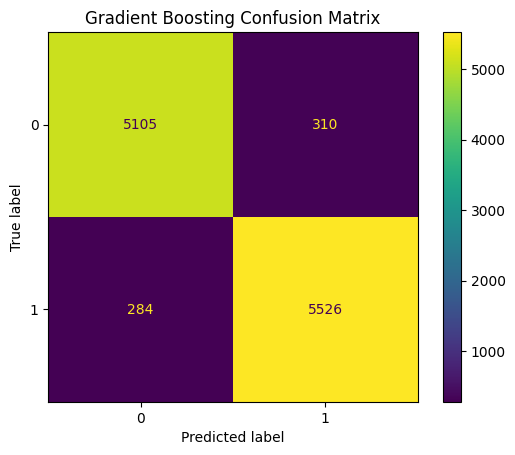

In [41]:
#Using Gradient Boost classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

gbm_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.4, max_depth=3)

gbm_model.fit(xv_train, y_train)

# Make predictions on the test data
y_pred_gbm = gbm_model.predict(xv_test)

# Evaluate the performance
print("Gradient Boosting Model Performance:")
print('Accuracy:', accuracy_score(y_test, y_pred_gbm))
print('Precision:', precision_score(y_test, y_pred_gbm))
print('Recall:', recall_score(y_test, y_pred_gbm))
print('F1 score:', f1_score(y_test, y_pred_gbm))

print('Classification Report:')
print(classification_report(y_test, y_pred_gbm))

# Check overall accuracy using confusion matrix
print('Confusion Matrix:')
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
cm_display_gbm = ConfusionMatrixDisplay(confusion_matrix = cm_gbm)
cm_display_gbm.plot()
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

**2.TF-IDF vectorizer**

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

#Fit and transform the text data
tfidf_x = tfidf_vectorizer.fit_transform(df1['text'])

#Split the TF-IDF vectorized data into training and testing sets
tfidf_x_train, tfidf_x_test, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_x, df1['class'], test_size=0.25)

print("TF-IDF vectorization complete.")
print("Shape of TF-IDF training data:", tfidf_x_train.shape)
print("Shape of TF-IDF testing data:", tfidf_x_test.shape)

TF-IDF vectorization complete.
Shape of TF-IDF training data: (33673, 5000)
Shape of TF-IDF testing data: (11225, 5000)


**Random forest classifier using TF-IDF**

Random Forest Model Performance with TF-IDF:
Accuracy: 0.9978619153674833
Precision: 0.9970694707808998
Recall: 0.998791227767225
F1 score: 0.9979296066252588
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5434
           1       1.00      1.00      1.00      5791

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

Confusion Matrix:


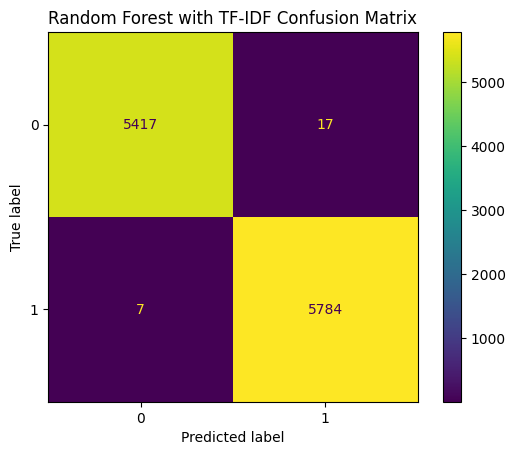

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Random Forest Classifier
rf_model_tfidf = RandomForestClassifier()

# Train the Random Forest model using TF-IDF training data
rf_model_tfidf.fit(tfidf_x_train, y_train_tfidf)

# Make predictions on the TF-IDF test data
y_pred_rf_tfidf = rf_model_tfidf.predict(tfidf_x_test)

# Evaluate the performance
print("Random Forest Model Performance with TF-IDF:")
print('Accuracy:', accuracy_score(y_test_tfidf, y_pred_rf_tfidf))
print('Precision:', precision_score(y_test_tfidf, y_pred_rf_tfidf))
print('Recall:', recall_score(y_test_tfidf, y_pred_rf_tfidf))
print('F1 score:', f1_score(y_test_tfidf, y_pred_rf_tfidf))

print('Classification Report:')
print(classification_report(y_test_tfidf, y_pred_rf_tfidf))

# Check overall accuracy using confusion matrix
print('Confusion Matrix:')
cm_rf_tfidf = confusion_matrix(y_test_tfidf, y_pred_rf_tfidf)
cm_display_rf_tfidf = ConfusionMatrixDisplay(confusion_matrix = cm_rf_tfidf)
cm_display_rf_tfidf.plot()
plt.title('Random Forest with TF-IDF Confusion Matrix')
plt.show()

**Logistic regression using TF-IDF**

Logistic Regression Model Performance with TF-IDF:
Accuracy: 0.9857461024498887
Precision: 0.9883781439722463
Recall: 0.9839405974788464
F1 score: 0.9861543786777431
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5434
           1       0.99      0.98      0.99      5791

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

Confusion Matrix:


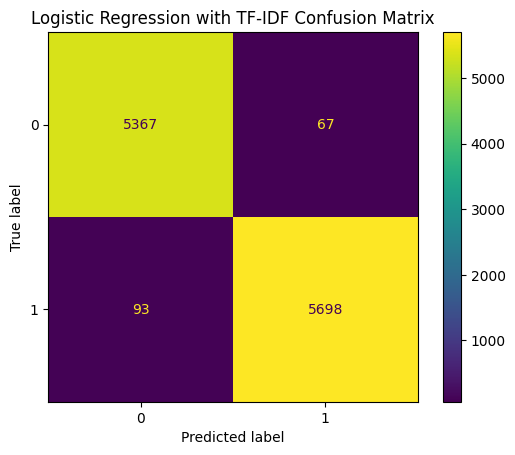

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
logistic_model_tfidf = LogisticRegression()

# Train the Logistic Regression model using TF-IDF training data
logistic_model_tfidf.fit(tfidf_x_train, y_train_tfidf)

# Make predictions on the TF-IDF test data
y_pred_lr_tfidf = logistic_model_tfidf.predict(tfidf_x_test)

# Evaluate the performance
print("Logistic Regression Model Performance with TF-IDF:")
print('Accuracy:', accuracy_score(y_test_tfidf, y_pred_lr_tfidf))
print('Precision:', precision_score(y_test_tfidf, y_pred_lr_tfidf))
print('Recall:', recall_score(y_test_tfidf, y_pred_lr_tfidf))
print('F1 score:', f1_score(y_test_tfidf, y_pred_lr_tfidf))

print('Classification Report:')
print(classification_report(y_test_tfidf, y_pred_lr_tfidf))

# Check overall accuracy using confusion matrix
print('Confusion Matrix:')
cm_lr_tfidf = confusion_matrix(y_test_tfidf, y_pred_lr_tfidf)
cm_display_lr_tfidf = ConfusionMatrixDisplay(confusion_matrix = cm_lr_tfidf)
cm_display_lr_tfidf.plot()
plt.title('Logistic Regression with TF-IDF Confusion Matrix')
plt.show()